In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Deep_learning-datasets/pima-indians-diabetes.csv')

In [ ]:
df.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Number_pregnant        768 non-null    int64  
 1   Glucose_concentration  768 non-null    float64
 2   Blood_pressure         768 non-null    float64
 3   Triceps                768 non-null    float64
 4   Insulin                768 non-null    float64
 5   BMI                    768 non-null    float64
 6   Pedigree               768 non-null    float64
 7   Age                    768 non-null    int64  
 8   Class                  768 non-null    int64  
 9   Group                  768 non-null    object 
dtypes: float64(6), int64(3), object(1)
memory usage: 60.1+ KB


In [ ]:
Group = pd.get_dummies(df['Group'],drop_first=True)

In [ ]:
df = pd.concat([df,Group],axis=1)

In [ ]:
df = df.drop('Group',axis=1)

In [ ]:
df.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,B,C,D
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,True,False,False
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,False,True,False
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,True,False,False
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,True,False,False
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,False,True,False


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop('Class', axis=1).values
y = df['Class'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scalar = MinMaxScaler()

In [ ]:
scaled_X_train = scalar.fit_transform(X_train)

In [ ]:
scaled_X_test = scalar.transform(X_test)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [ ]:
scaled_X_train.shape

(614, 11)

In [ ]:
model = Sequential()

model.add(Dense(11,activation='relu'))
# model.add(Dropout(0.5))

model.add(Dense(6,activation='relu'))
# model.add(Dropout(0.2))

# model.add(Dense(3,activation='relu'))
# model.add(Dropout(0.2))

model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(x=scaled_X_train,y=y_train,epochs=500,batch_size=256,validation_data=(scaled_X_test,y_test))

Epoch 1/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 183ms/step - accuracy: 0.3541 - loss: 0.7115 - val_accuracy: 0.3312 - val_loss: 0.7167
Epoch 2/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.3667 - loss: 0.7049 - val_accuracy: 0.3701 - val_loss: 0.7110
Epoch 3/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.3956 - loss: 0.7002 - val_accuracy: 0.4026 - val_loss: 0.7055
Epoch 4/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4416 - loss: 0.6959 - val_accuracy: 0.4221 - val_loss: 0.7002
Epoch 5/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5029 - loss: 0.6908 - val_accuracy: 0.4286 - val_loss: 0.6952
Epoch 6/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.5498 - loss: 0.6874 - val_accuracy: 0.4740 - val_loss: 0.6906
Epoch 7/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.5694 - loss: 0.6834 - val_accuracy: 0.5649 - val_loss: 0.6864
Epoch 8/500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6107 - loss: 0.6802 - val_accuracy: 0.5974 - val_loss

In [ ]:
losses = pd.DataFrame(model.history.history)

<Axes: >

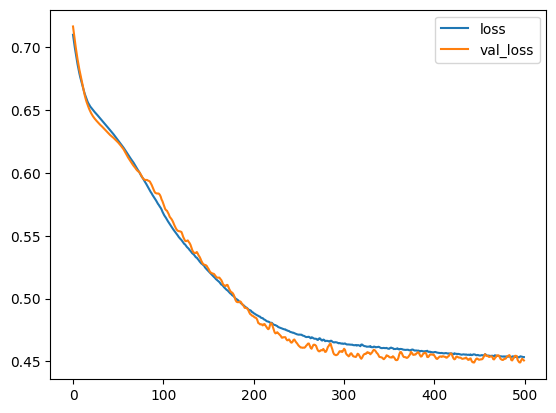

In [ ]:
losses[['loss','val_loss']].plot()

<Axes: >

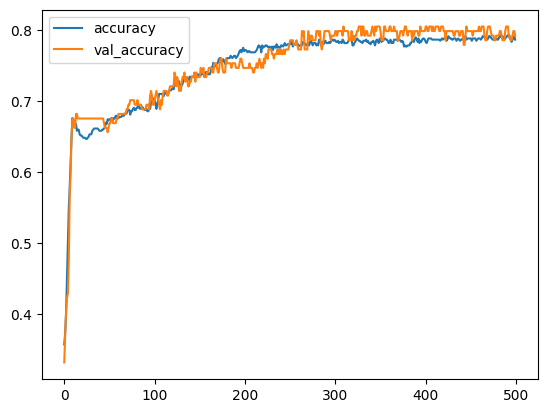

In [ ]:
losses[['accuracy','val_accuracy']].plot()

In [ ]:
predictions = model.predict(scaled_X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(y_test,predictions.round()))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       103
           1       0.72      0.61      0.66        51

    accuracy                           0.79       154
   macro avg       0.77      0.75      0.76       154
weighted avg       0.79      0.79      0.79       154



In [ ]:
confusion_matrix(y_test,predictions.round())

array([[91, 12],
       [20, 31]])

In [ ]:
import random
random.seed(42)
random_ind = random.randint(0,len(df))

new_patient = df.drop('Class',axis=1).iloc[random_ind]
new_patient

,654
Number_pregnant,1
Glucose_concentration,0.532663
Blood_pressure,0.57377
Triceps,0.282828
Insulin,0.159574
BMI,0.509687
Pedigree,0.027327
Age,22
B,False
C,False


In [ ]:
new_patient = scalar.transform([new_patient.values])

In [ ]:
new_patient

array([[0.05882353, 0.53266332, 0.57377049, 0.28282828, 0.15957447,
        0.50968703, 0.02895928, 0.01960784, 0.        , 0.        ,
        1.        ]])

In [ ]:
diabetes = model.predict(new_patient)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


In [ ]:
diabetes.round()

array([[0.]], dtype=float32)

In [ ]:
df.iloc[random_ind]['Class']

0

In [ ]:
# This person will not have diabetes